In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('../input/titanic/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# **Exploratory Data Analysis**

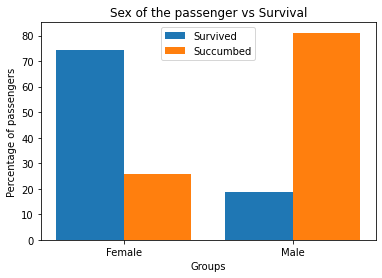

In [5]:
X = ['Female','Male']

female = train.loc[train["Sex"] == 'female']
male = train.loc[train["Sex"] == 'male']

total_female = len(female)
total_male = len(male)

Survived = [(len(female.loc[female["Survived"] == 1])/total_female)*100,
            (len(male.loc[male["Survived"] == 1])/total_male)*100]
Succumbed = [(len(female.loc[female["Survived"] == 0])/total_female)*100,
             (len(male.loc[male["Survived"] == 0])/total_male)*100]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Survived, 0.4, label = 'Survived')
plt.bar(X_axis + 0.2, Succumbed, 0.4, label = 'Succumbed')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Percentage of passengers")
plt.title("Sex of the passenger vs Survival")
plt.legend()
plt.show()

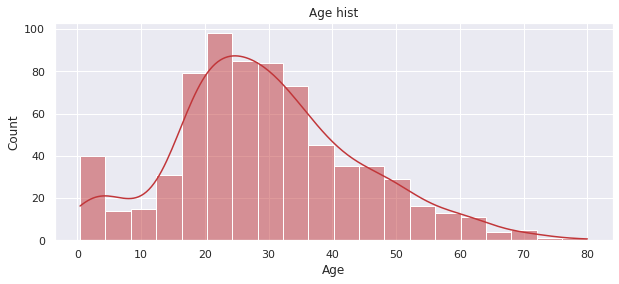

In [6]:
df = train

def hist(df,feature,title,color):
    
    sns.set(palette=color)
    fig = plt.figure(figsize = (10,4))
    sns.histplot(df[feature], kde=True)
    plt.title(title)
    plt.show()
    
hist(df,'Age','Age hist','RdBu')

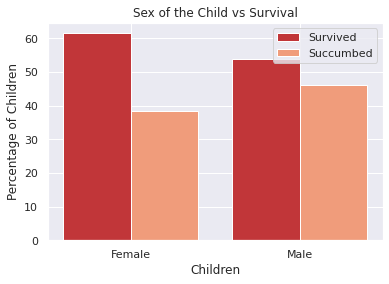

In [7]:
#Children (0-14 years) - C
#Youth (15-24 years) - Y
#Adults (25-64 years) - A
#Seniors (65 years and over) - S

def graphCat(female,male,xlabel,ylabel,title):
    
    X = ['Female','Male']

    total_female = len(female)
    total_male = len(male)
    
    Survived = []
    Succumbed = []
    
    if(total_female == 0):
        
        Survived = [0,(len(male.loc[male["Survived"] == 1])/total_male)*100]  
        Succumbed = [0,(len(male.loc[male["Survived"] == 0])/total_male)*100]
    
    else:
        
        Survived = [(len(female.loc[female["Survived"] == 1])/total_female)*100
                        ,(len(male.loc[male["Survived"] == 1])/total_male)*100]
        Succumbed = [(len(female.loc[female["Survived"] == 0])/total_female)*100
                         ,(len(male.loc[male["Survived"] == 0])/total_male)*100]
        
    X_axis = np.arange(len(X))

    plt.bar(X_axis - 0.2, Survived, 0.4, label = 'Survived')
    plt.bar(X_axis + 0.2, Succumbed, 0.4, label = 'Succumbed')

    plt.xticks(X_axis, X)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

femaleC = female[female['Age'] < 15]                   
maleC = male[male['Age'] < 15]

graphCat(femaleC,maleC,"Children","Percentage of Children","Sex of the Child vs Survival")


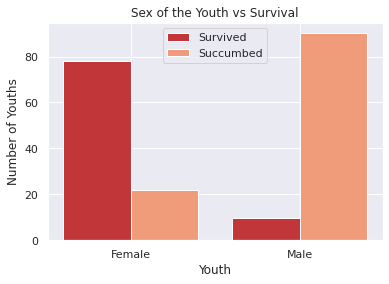

In [8]:

femaleY = female[(female['Age'] >= 15) & (female['Age'] < 25)]
maleY = male[(male['Age'] >= 15) & (male['Age'] < 25)]

graphCat(femaleY,maleY,"Youth","Number of Youths","Sex of the Youth vs Survival")

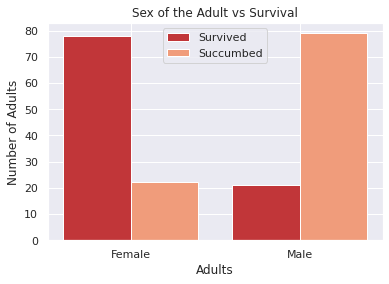

In [9]:

femaleA = female[(female['Age'] >= 25) & (female['Age'] < 65)]
maleA = male[(male['Age'] >= 25) & (male['Age'] < 65)]

graphCat(femaleA,maleA,"Adults","Number of Adults","Sex of the Adult vs Survival")

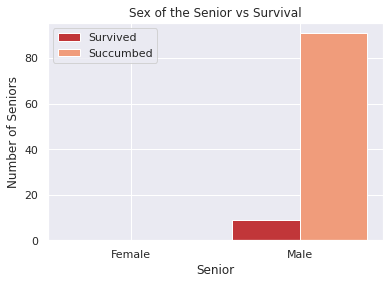

In [10]:

femaleS = female[female['Age'] >= 65]
maleS = male[male['Age'] >= 65]

graphCat(femaleS,maleS,"Senior","Number of Seniors","Sex of the Senior vs Survival")

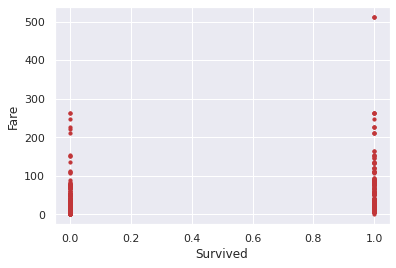

In [11]:
train.plot.scatter(x = 'Survived', y = 'Fare', s = 10);

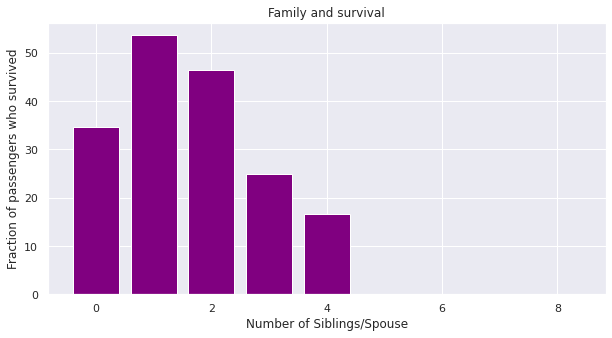

In [12]:

def familyFirst(category,xlabel,ylabel,title):
    
    p = train.groupby(category)
    
    sizes_total = list(p.size())
    num = list(p.groups.keys())  
    
    fam = train[train['Survived'] == 1].groupby(category)
    sizes = list(fam.size())
    
    perc = []
    
    for i in range(len(sizes_total)):
        
        if i <= len(sizes)-1:
            perc.append((sizes[i]/sizes_total[i])*100)
        else:
            perc.append(0)
    
    
    fig = plt.figure(figsize = (10, 5))
    plt.bar(num, perc, color ='purple')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    
familyFirst('SibSp','Number of Siblings/Spouse','Fraction of passengers who survived','Family and survival')

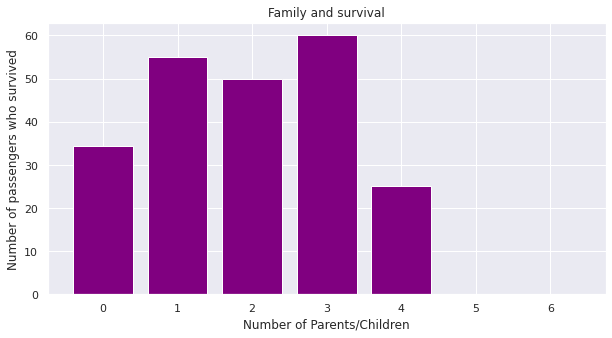

In [13]:

familyFirst('Parch','Number of Parents/Children','Number of passengers who survived','Family and survival')


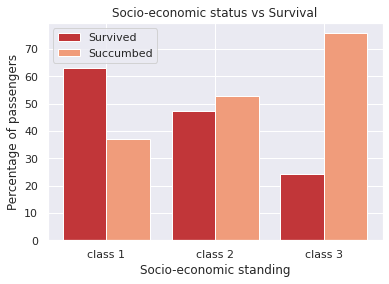

In [14]:
def Pclass(df,xlabel,ylabel,title):
    
    pc1 = df[df['Pclass'] == 1]
    pc2 = df[df['Pclass'] == 2]
    pc3 = df[df['Pclass'] == 3]

    total_pc1 = len(pc1)
    total_pc2 = len(pc2)
    total_pc3 = len(pc3)

    X = ['class 1','class 2','class 3']

    Survived = [(len(pc1[pc1['Survived'] == 1])/total_pc1)*100,
                (len(pc2[pc2['Survived'] == 1])/total_pc2)*100,
                (len(pc3[pc3['Survived'] == 1])/total_pc3)*100]

    Succumbed = [(len(pc1[pc1['Survived'] == 0])/total_pc1)*100,
                 (len(pc2[pc2['Survived'] == 0])/total_pc2)*100,
                 (len(pc3[pc3['Survived'] == 0])/total_pc3)*100]

    X_axis = np.arange(len(X))

    plt.bar(X_axis - 0.2, Survived, 0.4, label = 'Survived')
    plt.bar(X_axis + 0.2, Succumbed, 0.4, label = 'Succumbed')

    plt.xticks(X_axis, X)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()
    
Pclass(train,"Socio-economic standing","Percentage of passengers","Socio-economic status vs Survival")

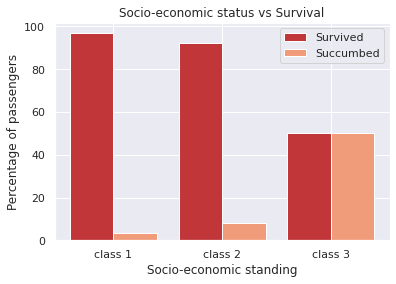

In [15]:
Pclass(female,"Socio-economic standing","Percentage of passengers","Socio-economic status vs Survival")

[Text(0.5, 0, 'Embarked at'), Text(0, 0.5, 'Survival Rate')]

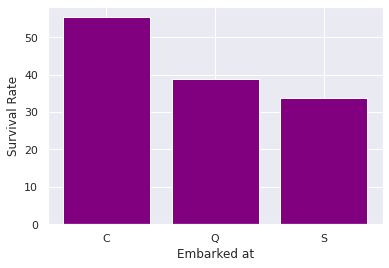

In [16]:
emb_surv = train[train['Survived'] == 1].groupby('Embarked')
surv = list(emb_surv.size())

total = list(train.groupby('Embarked').size())

X = ['C','Q','S']

perc_surv = []

for i in range(len(total)):
    
    survived = int(surv[i])
    tot = int(total[i])
    percentage = (survived/tot)*100
    
    perc_surv.append(percentage)
    
fig, ax = plt.subplots(1)
ax.bar(X, perc_surv, color ='purple')
ax.set(xlabel='Embarked at', ylabel='Survival Rate')


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fare'>

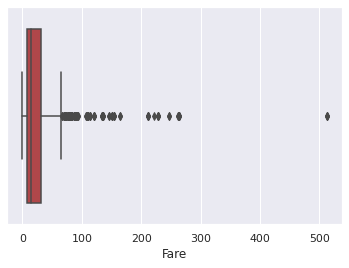

In [17]:
sns.boxplot(train['Fare'])

# **Feature Engineering**

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
test = pd.read_csv('../input/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Finding Numerical and Non-numerical features.

In [20]:
print("Numerical features in")
print('train df')
numf_train = [feature for feature in list(train.columns) if ((train[feature].dtype == int) or (train[feature].dtype == float))]
print(numf_train)
print('test df')
numf_test = [feature for feature in list(test.columns) if ((test[feature].dtype == int) or (test[feature].dtype == float))]
print(numf_test)

Numerical features in
train df
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
test df
['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [21]:
print("Non-numerical features in")
print('train df')
nonnumf_train = [feature for feature in list(train.columns) if (train[feature].dtype == object)]
print(nonnumf_train)
print('test df')
nonnumf_test = [feature for feature in list(test.columns) if (train[feature].dtype == object)]
print(nonnumf_test)


Non-numerical features in
train df
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
test df
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


# Find features with NaN values.

In [22]:
print('Numerical features with NaN in')
print('train df')
numf_train_NaN = [feature for feature in numf_train if train[feature].isnull().sum() > 0]
print(numf_train_NaN)
print('test df')
numf_test_NaN = [feature for feature in numf_test if test[feature].isnull().sum() > 0]
print(numf_test_NaN)

Numerical features with NaN in
train df
['Age']
test df
['Age', 'Fare']


In [23]:
print('Non-numerical features with NaN in')
print('train df')
nonnumf_train_NaN = [feature for feature in nonnumf_train if train[feature].isnull().sum() > 0]
print(nonnumf_train_NaN)
print('test df')
nonnumf_test_NaN = [feature for feature in nonnumf_test if test[feature].isnull().sum() > 0]
print(nonnumf_test_NaN)

Non-numerical features with NaN in
train df
['Cabin', 'Embarked']
test df
['Cabin']


# Imputation

In [24]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

for feature in numf_train_NaN:
    imp_mean = imp_mean.fit(train[feature].values.reshape(-1,1))
    train[feature] = imp_mean.transform(train[feature].values.reshape(-1,1))
    
for feature in numf_test_NaN:
    imp_mean = imp_mean.fit(test[feature].values.reshape(-1,1))
    test[feature] = imp_mean.transform(test[feature].values.reshape(-1,1))

for feature in nonnumf_train_NaN:
    imp_mode = imp_mode.fit(train[feature].values.reshape(-1,1))
    train[feature] = imp_mode.transform(train[feature].values.reshape(-1,1))
    
for feature in nonnumf_test_NaN:
    imp_mode = imp_mode.fit(test[feature].values.reshape(-1,1))
    test[feature] = imp_mode.transform(test[feature].values.reshape(-1,1))


<AxesSubplot:>

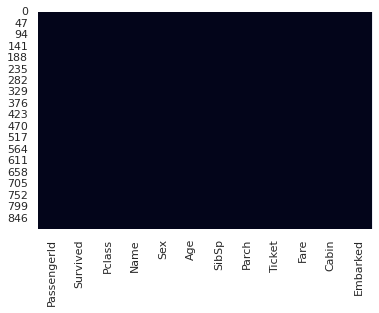

In [25]:
sns.heatmap(train.isnull(), cbar=False)

<AxesSubplot:>

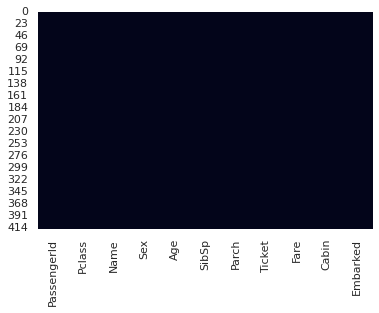

In [26]:
sns.heatmap(test.isnull(), cbar=False)

# Feature Splitting

In [27]:
#train['Name'].values

In [28]:
def extractNameComponents(df):  
    
    lastList = []
    honorificList = []

    for string in list(df['Name']):
        
        first_split = string.split(", ")
        lastList.append(first_split[0])
        
        second_split = first_split[1].split(" ")
        honorificList.append(second_split[0])

       
    return lastList,honorificList
        
lastList,honorificList = extractNameComponents(train)

s_last = pd.Series(lastList, index=np.arange(891))
train.insert(len(train.columns)-1, 'Last Name', s_last.values)

s_honorific = pd.Series(honorificList, index=np.arange(891))
train.insert(len(train.columns)-1, 'Honorific', s_honorific.values)     


train = train.drop(['Name'],axis=1)

In [29]:
lastList,honorificList = extractNameComponents(test)

s_last = pd.Series(lastList, index=np.arange(418))
test.insert(len(test.columns)-1, 'Last Name', s_last.values)

s_honorific = pd.Series(honorificList, index=np.arange(418))
test.insert(len(test.columns)-1, 'Honorific', s_honorific.values)     

test = test.drop(['Name'],axis=1)

In [30]:
#train['Last Name'].value_counts().to_dict()
#train['Honorific'].value_counts()

In [31]:
#test['Last Name'].value_counts().to_dict()
#test['Honorific'].value_counts()

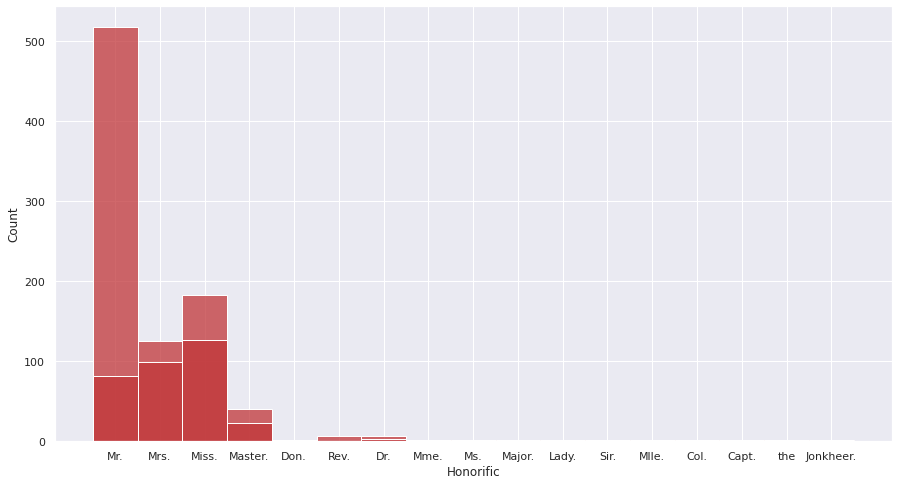

In [32]:
#sns.set(rc={'figure.figsize':(15,5)})
#sns.histplot(data=train, x="Honorific")

fig, ax = plt.subplots(figsize=(15,8))

for a in [train, train[train['Survived'] == 1]]:
    sns.histplot(a, x = 'Honorific', ax=ax, kde=False)


# Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  

train[['Age','Fare']] = pd.DataFrame(scaler.fit_transform(train[['Age','Fare']]))
test[['Age','Fare']] = pd.DataFrame(scaler.transform(test[['Age','Fare']]))
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Last Name,Honorific,Embarked
0,892,3,male,0.369449,0,0,330911,-0.490783,B57 B59 B63 B66,Kelly,Mr.,Q
1,893,3,female,1.331378,1,0,363272,-0.507479,B57 B59 B63 B66,Wilkes,Mrs.,S
2,894,2,male,2.485693,0,0,240276,-0.453367,B57 B59 B63 B66,Myles,Mr.,Q
3,895,3,male,-0.207709,0,0,315154,-0.474005,B57 B59 B63 B66,Wirz,Mr.,S
4,896,3,female,-0.592481,1,1,3101298,-0.401017,B57 B59 B63 B66,Hirvonen,Mrs.,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,0.044131,0,0,A.5. 3236,-0.486337,B57 B59 B63 B66,Spector,Mr.,S
414,1306,1,female,0.715743,0,0,PC 17758,1.544246,C105,Oliva y Ocana,Dona.,C
415,1307,3,male,0.677266,0,0,SOTON/O.Q. 3101262,-0.502445,B57 B59 B63 B66,Saether,Mr.,S
416,1308,3,male,0.044131,0,0,359309,-0.486337,B57 B59 B63 B66,Ware,Mr.,S


# Categorical Encoding

In [34]:
y = train['Survived']
train = train.drop('Survived',axis=1)

sub2 = test['PassengerId']

In [35]:
overall = pd.concat([train.assign(ind="train"),test.assign(ind="test")])
overall.reset_index(inplace=True, drop=True)


In [36]:
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

to_encode = ['Sex','Ticket','Cabin','Last Name','Honorific','Embarked']

def encode_and_join(df,to_encode,enc):
    
    for feature in to_encode:        

        enc.fit(df[feature].values.reshape(-1,1))
        new = pd.DataFrame(enc.transform(df[feature].values.reshape(-1,1)).toarray())
        new.columns = enc.get_feature_names([feature])
        df = pd.concat([df,new],axis=1)
        df.drop(feature, inplace=True, axis=1)
        
    return df

        
overall = encode_and_join(overall,to_encode,enc)

overall

,PassengerId,Pclass,Age,SibSp,Parch,Fare,ind,Sex_female,Sex_male,Ticket_110152,...,Honorific_Mme.,Honorific_Mr.,Honorific_Mrs.,Honorific_Ms.,Honorific_Rev.,Honorific_Sir.,Honorific_the,Embarked_C,Embarked_Q,Embarked_S
0,1,3,-0.592481,1,0,-0.502445,train,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,0.638789,1,0,0.786845,train,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,3,-0.284663,0,0,-0.488854,train,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,0.407926,1,0,0.420730,train,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,3,0.407926,0,0,-0.486337,train,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,0.044131,0,0,-0.486337,test,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1305,1306,1,0.715743,0,0,1.544246,test,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1306,1307,3,0.677266,0,0,-0.502445,test,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1307,1308,3,0.044131,0,0,-0.486337,test,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Model Building

In [37]:
test, train = overall[overall["ind"].eq("test")], overall[overall["ind"].eq("train")]
train = train.drop(['ind'],axis=1)
test = test.drop(['ind'],axis=1)
test.reset_index()
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,...,Honorific_Mme.,Honorific_Mr.,Honorific_Mrs.,Honorific_Ms.,Honorific_Rev.,Honorific_Sir.,Honorific_the,Embarked_C,Embarked_Q,Embarked_S
891,892,3,0.369449,0,0,-0.490783,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
892,893,3,1.331378,1,0,-0.507479,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
893,894,2,2.485693,0,0,-0.453367,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
894,895,3,-0.207709,0,0,-0.474005,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
895,896,3,-0.592481,1,1,-0.401017,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,0.044131,0,0,-0.486337,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1305,1306,1,0.715743,0,0,1.544246,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1306,1307,3,0.677266,0,0,-0.502445,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1307,1308,3,0.044131,0,0,-0.486337,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
'''
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


lr = LogisticRegression()
rf = RandomForestClassifier()
gnb = GaussianNB()

param_grid_lr = {'solver': ['liblinear'],
              'penalty': ['l2'],
              'C': np.logspace(-4, 4, 4)}
param_grid_rf = {'n_estimators': [10, 100, 1000],
                 'max_features': ['sqrt', 'log2']}
param_grid_gnb = {'var_smoothing': np.logspace(0,-9, num=100)}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid_lr, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train, y)
print('linear regression',grid_result.best_score_,grid_result.best_params_)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid_rf, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train, y)
print('random forest',grid_result.best_score_,grid_result.best_params_)

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid_gnb, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train, y)
print('naive bayes',grid_result.best_score_,grid_result.best_params_)
'''

"\nfrom sklearn.model_selection import cross_val_score\nfrom sklearn.model_selection import RepeatedStratifiedKFold\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.naive_bayes import GaussianNB\n\n\nlr = LogisticRegression()\nrf = RandomForestClassifier()\ngnb = GaussianNB()\n\nparam_grid_lr = {'solver': ['liblinear'],\n              'penalty': ['l2'],\n              'C': np.logspace(-4, 4, 4)}\nparam_grid_rf = {'n_estimators': [10, 100, 1000],\n                 'max_features': ['sqrt', 'log2']}\nparam_grid_gnb = {'var_smoothing': np.logspace(0,-9, num=100)}\n\ncv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)\n\ngrid_search = GridSearchCV(estimator=lr, param_grid=param_grid_lr, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)\ngrid_result = grid_search.fit(train, y)\nprint('linear regression',grid_result.best_score_,grid_result.best_params_)

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=10000,solver='liblinear',penalty='l2')

model.fit(train,y)
pred = model.predict(test)

In [40]:
sub = pd.DataFrame(pred)
sub1 = sub.rename({0 : 'Survived'},axis=1)
sub1.reset_index(drop=True, inplace=True)

sub2.reset_index(drop=True, inplace=True)

sub3 = pd.merge(sub2, sub1, left_index=True, right_index=True)

sub3.to_csv('submission.csv', index=False)